Introduction


The titanic was a luxury liner with state of the art equipment and luxury accomodations.  Even third class passengers had some ammenities available than other ships at the time.  The titanic's maiden voyage began April 10, 1912.  It was crossing the Atlantic when it sank on April 15, 1912, after striking an iceberg.  Only approximately 700 of the approximately 2,200 people aboard survived the sinking of the titanic.  In the aftermath of this tradgedy the fact that so few people survived is a popular point of discussion.  At the time there were multiple investigations and inquiries by the American and British governments. It should be noted that maritime law today reflects changes and laws there were created in the aftermath of this tradgedy.  
On the Titanic, there were only life boats aboard for 1,174 passengers and crew, this was in accordance with maritime law at the time.  At the time, the ship was thought to be unsinkable and the life boats were meant to ferry passengers between its rescuing ship and the distressed ship.  Since no ship responded immediately to the Titanic's distress calls passengers wound up staying on the lifeboats for several hours.  Another factor that that effected the usage of the life boats was that evacuation orders followed the women and children first protocol. Life boats left the titanic partially empty in some cases because only women or children were placed aboard the life boat.   

The sinking of the titanic was a horrific tradgedy in which many people died.   Based on a preliminary glance at the data I would like to look at the likelihood of surving from several difference angles.  I have a few questions that I plan on using the analysis to answer including: 

Was it in fact the case that women and children were more likely to survive? How significant are the results? 
Was a class a factor in whether a person survived?
Was the age of the survivors skewed to younger, even if young children whom survived are 
excluded? 
Were people traveling alone more or less likely to survive? 


In [1]:
import numpy as np 
import pandas as pd 
%pylab inline 
import matplotlib.pyplot as plt
import seaborn as sns 


Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_df=pd.read_csv('titanic-data.csv') #Created a data Frame with the CSV file provided. 

Description of Variables and Keys

Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
titanic_df.head(10)  #Top 10 data to look at what the sample looks like 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.tail(10)  #Bottom 10 data to look at what the sample looks like 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
titanic_df.describe()
#Describes the data as initally uploaded without any wrangling. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at some of the statistics in the sample one can begin to infer that there are some commonalities among the passengers that survived the sinking of the titanic.   The average age of the sample was 29.6, almost half of sample was traveling alone (no sibling/spouse or parent/child), the lowest fair was 0, and about 38% of the passengers survived.   The items that this analysis are likelihood of survival as related to average age, class, sex, and travel partners (children, parents, spouses, siblings). 
    

Analysis of Age as a factor in survival:

In [6]:
titanic_df.groupby(['Survived'])['Age'].describe() #Groups the data by Survived and Looks at statistics for Age 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


**The age category was missing for 177 individuals.  Those had an age of NAN were excluded for the sample.  

In [7]:
titanic_df.groupby(['Survived'])['Age'].median() #Groups the data by Survived and Looks at the median for Age

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

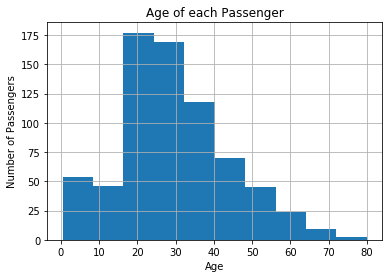

In [8]:
#The ages of all passengers in the sample histogram. 
plt.figure()
titanic_df['Age'].hist(bins=10)
plt.ylabel('Number of Passengers')
plt.xlabel('Age')
plt.title('Age of each Passenger')
plt.show()

Those whom survived were slightly but not significantly younger on average than those whom did not.  The majority of the passengers were between 20 and 40.  I would like to take a look at children 12 and under more closely.   

In [9]:
#Look at Children under 12.  

        
age_titanic=titanic_df['Age']<=12
titanic_df[age_titanic].mean()


PassengerId    432.434783
Survived         0.579710
Pclass           2.637681
Age              4.770580
SibSp            1.869565
Parch            1.405797
Fare            31.536352
dtype: float64

In [10]:
#Children data counted grouped by survivor 
titanic_df[age_titanic].groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,29.0,6.00000,3.555680,1.00,2.0,7.0,9.0,11.0
1,40.0,3.87925,3.004404,0.42,1.0,3.5,5.0,12.0


Look at different statistics for the children under 12: 

In [11]:
titanic_df[age_titanic].groupby('Survived')['Pclass'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,29.0,2.931034,0.371391,1.0,3.0,3.0,3.0,3.0
1,40.0,2.425000,0.635993,1.0,2.0,2.5,3.0,3.0


In [12]:

titanic_df[age_titanic].groupby('Survived')['SibSp'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,29.0,3.172414,1.465532,0.0,3.0,4.0,4.0,5.0
1,40.0,0.925000,0.971055,0.0,0.0,1.0,1.0,4.0


In the sample there were 69 children, 40 children (58%) survived and 29 children (42%) perished.  The average age of the survivors was 3.8 years old whereas nonsurvivors were older on average at 6.0 years old.  The children with Sibsp (sibilings and spouse) is significantly higher than the average for children that did not survive.   A possible explanation for this is that children from larger familes had trouble keeping everyone together in the sinking ship.  One could hypothesize that younger children in smaller families had a greater liklihood of surviving.    This is only preliminary analysis and there could be other factors effecting the likelihood of survival.  

In [13]:
mean_Age=titanic_df['Age'].mean()
difference_mean=titanic_df.loc[883,'Age']-mean_Age
print (difference_mean/(titanic_df['Age'].std(ddof=0)))

def standardize_data(element): #Calculates the zcore of an element 
    mean_element=element.mean()
    difference_mean=element-mean_element
    return (difference_mean/(element.std(ddof=0)))
standardize_age=(standardize_data(titanic_df['Age']))
standardize_survivor=(standardize_data(titanic_df['Survived']))
standardize_SibSp=(standardize_data(titanic_df['SibSp']))
standardize_pclass=(standardize_data(titanic_df['Pclass']))
standardize_parch=(standardize_data(titanic_df['Parch']))

-0.117048777676


In [14]:
def correlation(standard_x, standard_y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    correlation=(standard_x*standard_y).mean()
    return correlation


In [15]:
correlation_age_survivor=correlation(standardize_age,standardize_survivor)
print (correlation_age_survivor)

-0.077982678413863


As expected age had a negative correlation with a likelihood of surviving.  The correlation between age is not as significant but it was still likely that a younger person would be a survivor.  Younger people all in all had a higher percentage of surviving 58% child survivors vs 40% of total survivors. I would just like to note that correlation is not causation and that these are only prelimiary findings. Also note that children only accounted for 10% of the sample and 177 data points were missing.

Analysis of Pclass as a factor in survival:

In [16]:
titanic_df.groupby(['Survived'])['Pclass'].describe() 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


In [17]:
#Pclass Analaysis - There were 3 classes aboard the Titanic as described above. 
titanic_df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [18]:
#Turns Survival into a Text to be used in graphs
def change_to_Survivor(element):
    if element== 0: 
        return "NonSurvival" 
    elif element==1:
        return "Survival"

In [19]:
titanic_df['Survivor_Status']=titanic_df['Survived'].apply(change_to_Survivor)


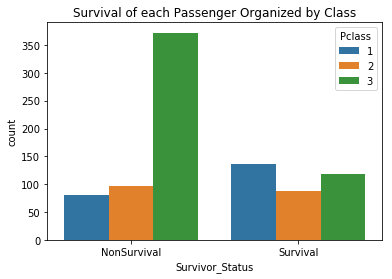

In [20]:
# Plot to illustrate survivor vs class
sns.countplot(x="Survivor_Status", hue="Pclass", data=titanic_df)
plt.title('Survival of each Passenger Organized by Class')
plt.show()


At first glance, class looks like it may be more of a siginicant indicator of surviving the titanic.   When comparing the average survivors by class: 63% of the people in first class survived, 47% of the people in second class survived while only 24.2% in the third class survived. Also survivors class when averaged is lower than those whom did not survive and also lower than the entire sample's average class.  
Note: There are less people in first and second class combined than in third class with second class passengers being the smallest class.  

Correlation between class and likelihood of survival: 

In [21]:
correlation_pclass_survivor=correlation(standardize_pclass,standardize_survivor)
print (correlation_pclass_survivor)

-0.33848103596101325


There is a more significant correlation between surviving and class/socioeconomic status. As class increased (the socioeconomic status declines) and the likelihood of survival decreases.  Again, there are many other factors that could continue to this occurance such as closer proximity to the life boats for first class passengers but there is a medium correlation between class and a person's chance of survival.  

Analysis of Sex as a factor in survival:

In [22]:
titanic_df.groupby(['Sex'])['Pclass'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,2.159236,0.85729,1.0,1.0,2.0,3.0,3.0
male,577.0,2.389948,0.81358,1.0,2.0,3.0,3.0,3.0


In [23]:
titanic_df.groupby(['Sex'])['Survived'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [24]:
titanic_df.groupby(['Sex'])['Age'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [25]:
titanic_df.groupby(['Sex'])['Parch'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.649682,1.022846,0.0,0.0,0.0,1.0,6.0
male,577.0,0.235702,0.612294,0.0,0.0,0.0,0.0,5.0


In [26]:
titanic_df.groupby(['Sex'])['SibSp'].describe() #'Age', 'Sibsp','Fare'])

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.694268,1.156520,0.0,0.0,0.0,1.0,8.0
male,577.0,0.429809,1.061811,0.0,0.0,0.0,0.0,8.0


There were 314 females and 577 males in the sample.   One interersting thing to note is that of the average of survived females is signifcantly higher than the average males. The graph above displays a comparison of the total amount of males 

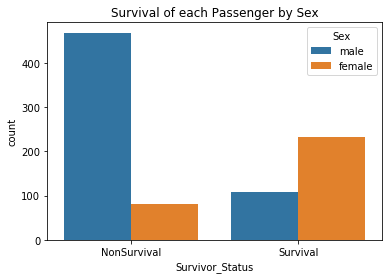

In [27]:
#Graphic of Survival and Sex 
sns.countplot(x="Survivor_Status", hue="Sex", data=titanic_df)# Plot to show how many men died as compared to how many women survived cite: udacity forum 
plt.title('Survival of each Passenger by Sex')
plt.show()


In [28]:
#Males Specific data 
males_titanic=titanic_df['Sex']=='male' #Creates boolean for any male 
females_titanic=titanic_df['Sex']=='female' #Creates boolean for any female 

In [29]:
titanic_df[males_titanic].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [30]:
titanic_df[females_titanic].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [31]:
titanic_df[males_titanic].groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,449.121795,2.476496,31.618056,0.440171,0.207265,21.960993
1,475.724771,2.018349,27.276022,0.385321,0.357798,40.821484


In [32]:
titanic_df[females_titanic].groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,434.851852,2.851852,25.046875,1.209877,1.037037,23.024385
1,429.699571,1.918455,28.847716,0.515021,0.515021,51.938573


In [33]:
#Function to create a new function 
def change_to_num(element):
    if element=='female': 
        return 1
    elif element=='male':
        return 0

In [34]:
#Standardize sex where 1 is female and 0 is male
#Create a numerical representation of male and female 
titanic_df['NumSex']=titanic_df['Sex'].apply(change_to_num)


In [35]:
standardize_sex=(standardize_data(titanic_df['NumSex']))

In [36]:
#Correlation of sex and Survival 
correlation_sex_survivor=correlation(standardize_sex,standardize_survivor)
print (correlation_sex_survivor)

0.5433513806577474


Of the total sample only 109 men survived while 233 women survived. Based on my analysis of the statistics above the men and women that survived were on average in a higher class and higher socioeconomic background.  Standardizing the data, I found that there was a medium significant correlation between being a man and surviving.  Both were slightly younger than the total sample.   

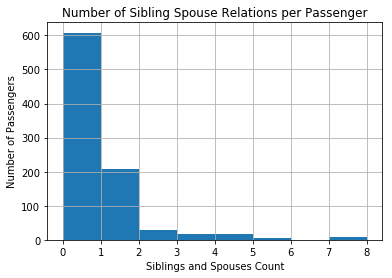

In [37]:
#Look at the SibSp Sibling/Spouse Relations 
plt.figure()
titanic_df['SibSp'].hist(bins=8)
plt.ylabel('Number of Passengers')
plt.xlabel('Siblings and Spouses Count')
plt.title('Number of Sibling Spouse Relations per Passenger')
plt.show()

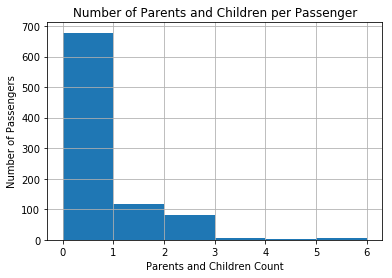

In [38]:
#Look at the Parch Relations 
plt.figure()
titanic_df['Parch'].hist(bins=6)
plt.ylabel('Number of Passengers')
plt.xlabel('Parents and Children Count')
plt.title('Number of Parents and Children per Passenger')
plt.show()

Tax another look at the statistics for SibSp and Parch: 

In [39]:
titanic_df['SibSp'].describe() 

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [40]:
titanic_df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

One interesting thing is that the bottom 50% of both sets are 0.  Let's take a look further at how many were traveling without Siblings, Spouses or Parent and children.   

In [41]:
traveling_no_spouse_sib=titanic_df['SibSp']==0   # Traveling without siblings or a spouse  

In [42]:
#Statistics for traveling no sib or spouse
titanic_df[traveling_no_spouse_sib].describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NumSex
count,608.000000,608.000000,608.000000,471.000000,608.0,608.000000,608.000000,608.000000
mean,455.370066,0.345395,2.351974,31.397558,0.0,0.185855,25.692028,0.286184
std,255.992322,0.475888,0.824539,13.647767,0.0,0.585377,49.733052,0.452349
min,3.000000,0.000000,1.000000,0.420000,0.0,0.000000,0.000000,0.000000
25%,232.750000,0.000000,2.000000,22.000000,0.0,0.000000,7.795800,0.000000
50%,461.500000,0.000000,3.000000,29.000000,0.0,0.000000,9.500000,0.000000
75%,678.500000,1.000000,3.000000,39.000000,0.0,0.000000,26.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,0.0,5.000000,512.329200,1.000000


608 passengers in the sample were traveling alone.   34.5% of the passengers survived which is slightly less than the sample.   There are samples of single parents (no spouse) traveling with their children in the sample.  

In [43]:
#traveling without parents or children 
traveling_no_par_child=titanic_df['Parch']==0

In [44]:
#Description of the person traveling without parents or children: 
titanic_df[traveling_no_par_child].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NumSex
count,678.000000,678.000000,678.000000,521.000000,678.000000,678.0,678.000000,678.000000
mean,445.255162,0.343658,2.321534,32.178503,0.237463,0.0,25.586774,0.286136
std,256.163557,0.475279,0.836665,12.570448,0.496321,0.0,41.878786,0.452287
min,1.000000,0.000000,1.000000,5.000000,0.000000,0.0,0.000000,0.000000
25%,224.250000,0.000000,2.000000,22.000000,0.000000,0.0,7.854200,0.000000
50%,452.500000,0.000000,3.000000,30.000000,0.000000,0.0,10.500000,0.000000
75%,665.750000,1.000000,3.000000,39.000000,0.000000,0.0,26.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,3.000000,0.0,512.329200,1.000000


Interesting as well 678 passengers were without parents or children that includes children that were traveling with a nanny (whom would have a Parch of 0).  Similarly 34.3% survived.  The two have a few similar statistics and one would assume that there is some overlap between the two. 

In [45]:
#Correlation between surviving and parent children 
correlation_pclass_survivor=correlation(standardize_parch,standardize_survivor)
print (correlation_pclass_survivor)

0.08162940708348272


In [46]:
#Correlation between surviving and sibling and spouses 
correlation_pclass_survivor=correlation(standardize_SibSp,standardize_survivor)
print (correlation_pclass_survivor)

-0.03532249888573573


There is a positive correlation between parent child relationship. Looking at the data we could make some educated guess that many women traveled with their children and that they were more likely to survive.  Also one can assume, that men with children may be more likely to be placed on the life boat over a single man.  Just note that this is not a definitive answer but based on the statistics we have looked these factors having an effect on survival chances seem likely. 

As sibling spouse increase the likelihood of survival decreases.  This is interesting but one could hypothesize that this is because men were more likely to travel alone.  

Conclusion: 
    After analyzing the data one can conclude that the biggest determminants for survival were sex and class.  Sex, with a preference for women is the biggest factor and could possibly be linked to women and children protocols for ships in 1912.  Class the second largest factor, also seems to have a correlation with survival.  Higher class or socioeconomic status seemed to drastically increase one's odds for survival.  

While the analysis looks at many of the factors that correlate with survival of the titanic there are some limitations to the analysis performed. For example in the age category information was missing.  In the analysis of the age data there were 177 individuals missing from the analysis.  That is a large portion of the data (19.8% of the sample) and could have a signficant effect, we just can't be sure.  Another limitation with the data is that there could be other factors that were not in the dataset (lurking variables) such as existing medical conditions and physical .  For example we do not know anything about medical conditions which also had a significant correlation with survival. Again there is no information available.  A more comprehensive examination and more information is required for the analysis to provide a more complete picture of the titanic survivors. 


Sources: 
    http://matplotlib.org/api/pyplot_api.html
    Also used the udacity forum 
    https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php
    https://chrisalbon.com/python/pandas_assign_new_column_dataframe.html
    Materials from the class were also used. 
    Various stack overflow forum posts.  
    